In [1]:
import numpy as np

import matplotlib as mpl
import matplotlib.pyplot as plt

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.losses import SparseCategoricalCrossentropy
from tensorflow.keras.optimizers import Adam

from sklearn.model_selection import train_test_split

from utils import gen_data, gen_blob, LinModel, plot_cat_decision_boundary, plt_mc_data, eval_cat_err

## **Data for Polynomial Regression Model**

In [2]:
X,y,x_ideal,y_ideal = gen_data(18, 2, 0.7)

In [3]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.33, random_state=1)

In [4]:
print("X_train.shape", X_train.shape, "y_train.shape", y_train.shape)
print("X_test.shape", X_test.shape, "y_test.shape", y_test.shape)

X_train.shape (12,) y_train.shape (12,)
X_test.shape (6,) y_test.shape (6,)


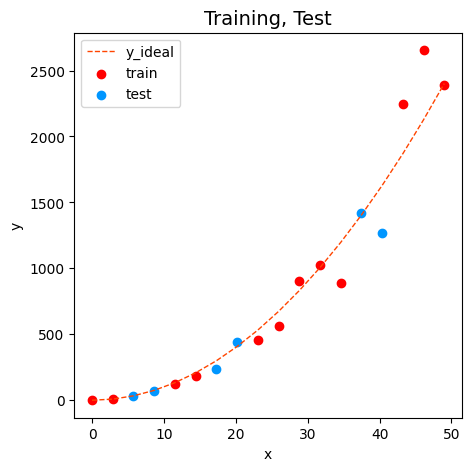

In [5]:
fig, ax = plt.subplots(1,1,figsize=(5,5))
ax.plot(x_ideal, y_ideal, "--",color="orangered", label="y_ideal",lw=1)
ax.set_title("Training, Test", fontsize=14)
ax.set_xlabel("x")
ax.set_ylabel("y")

ax.scatter(X_train, y_train, color="red", label="train")
ax.scatter(X_test, y_test, color='#0096ff', label='test')
ax.legend(loc='upper left')
plt.show()

## **Polynomial Regression Model with and without Regularization**

In [6]:
degree = 10

linmodel = LinModel(degree=degree)
linmodel.fit(X_train=X_train, y_train=y_train)

In [7]:
ypred = linmodel.predict(X=X_train)
train_err = linmodel.mse(y=y_train, ypred=ypred)

In [8]:
ypred = linmodel.predict(X=X_test)
test_err = linmodel.mse(y=y_test, ypred=ypred)

In [9]:
print(f"Training error: {train_err:0.2f}, Testing error: {test_err:0.2f}")

Training error: 58.01, Testing error: 171215.01


In [10]:
x = np.linspace(0, int(X.max()), 100)
ypred = linmodel.predict(X=x).reshape(-1,1)

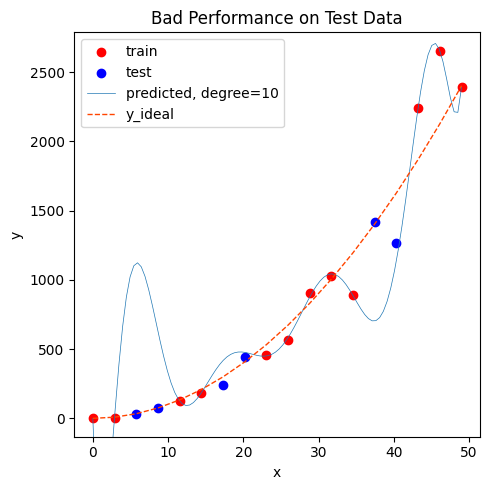

In [11]:
fig, ax = plt.subplots(1,1, figsize=(5,5))

ax.set_title("Bad Performance on Test Data", fontsize=12)
ax.set_xlabel("x")
ax.set_ylabel("y")

ax.scatter(X_train, y_train, color="red", label="train")
ax.scatter(X_test, y_test, color="blue", label="test")
ax.set_xlim(ax.get_xlim())
ax.set_ylim(ax.get_ylim())
ax.plot(x, ypred, lw=0.5, label=f"predicted, degree={degree}")
ax.plot(x_ideal, y_ideal, "--", color="orangered", label="y_ideal", lw=1)
ax.legend(loc='upper left')
plt.tight_layout()
plt.show()

## **Fine tuning Regularization**

In [12]:
X,y,x_ideal,y_ideal = gen_data(40, 5, 0.7)
print("X.shape: ", X.shape, "y.shape: ", y.shape)

X.shape:  (40,) y.shape:  (40,)


In [13]:
X_train, X_some, y_train, y_some = train_test_split(X,y,test_size=0.40,random_state=1)
print("X_train.shape: ", X_train.shape, "y_train.shape: ", y_train.shape)

X_train.shape:  (24,) y_train.shape:  (24,)


In [14]:
X_cv, X_test, y_cv, y_test = train_test_split(X_some, y_some, test_size=0.50, random_state=1)
print("X_cv.shape: ", X_cv.shape, "y_cv.shape: ", y_cv.shape)
print("X_test.shape: ", X_test.shape, "y_test.shape: ", y_test.shape)

X_cv.shape:  (8,) y_cv.shape:  (8,)
X_test.shape:  (8,) y_test.shape:  (8,)


In [15]:
lambda_list = np.array([00, 1e-6, 1e-5, 1e-4, 1e-3, 1e-2, 1e-1, 1, 10, 100])
steps = len(lambda_list)
degree = 10
train_err = np.zeros(steps)
cv_err = np.zeros(steps)
x == np.linspace(0, int(X.max()), 100)
y_pred = np.zeros((100, steps))

In [16]:
for i in range(steps):
    lambda_ = lambda_list[i]
    linmodel = LinModel(degree=degree, regularization=True, lambda_=lambda_)
    linmodel.fit(X_train, y_train)
    ypred = linmodel.predict(X_train)
    train_err[i] = linmodel.mse(y_train, ypred)
    ypred = linmodel.predict(X_cv)
    cv_err[i] = linmodel.mse(y_cv, ypred)
    y_pred[:,i] = linmodel.predict(x)

optimal_reg_index = np.argmin(cv_err)

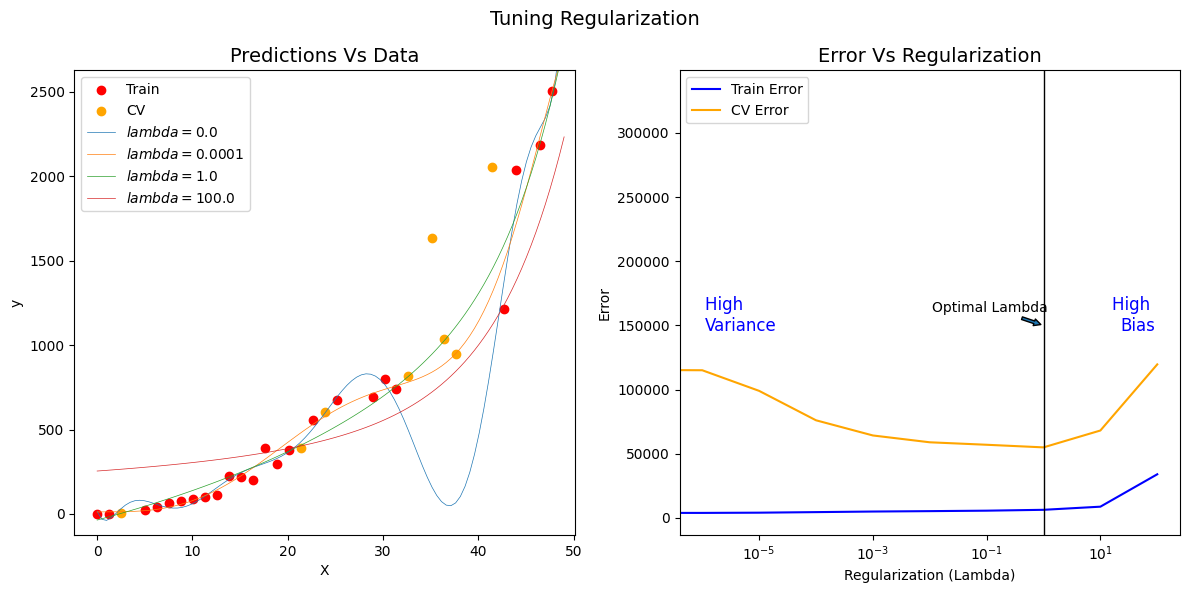

In [17]:
fig, ax = plt.subplots(1,2, figsize=(12,6))

ax[0].set_title("Predictions Vs Data", fontsize=14)
ax[0].set_xlabel("X")
ax[0].set_ylabel("y")

ax[0].scatter(X_train, y_train, color="red", label="Train")
ax[0].scatter(X_cv, y_cv, color="orange", label="CV")
ax[0].set_xlim(ax[0].get_xlim())
ax[0].set_ylim(ax[0].get_ylim())

for i in (0,3,7,9):
    ax[0].plot(x, y_pred[:,i], lw=0.5, label=f"$lambda =${lambda_list[i]}")
ax[0].legend()

ax[1].set_title("Error Vs Regularization", fontsize=14)
ax[1].plot(lambda_list, train_err[:], label="Train Error", color="blue")
ax[1].plot(lambda_list, cv_err[:], label="CV Error", color="orange")

ax[1].set_xscale('log')
ax[1].set_ylim(*ax[1].get_ylim())

opt_x = lambda_list[optimal_reg_index]

ax[1].vlines(opt_x, *ax[1].get_ylim(), color="black", lw=1)
ax[1].annotate("Optimal Lambda", (opt_x, 150000), xytext=(-80,10), textcoords="offset points", arrowprops={'arrowstyle':'simple'})

ax[1].set_xlabel("Regularization (Lambda)")
ax[1].set_ylabel("Error")

fig.suptitle("Tuning Regularization", fontsize=14)

ax[1].text(0.05, 0.44, "High \nVariance", fontsize=12, ha='left', transform=ax[1].transAxes, color="blue")
ax[1].text(0.95, 0.44, "High \nBias", fontsize=12, ha='right', transform=ax[1].transAxes, color="blue")
ax[1].legend(loc="upper left")

plt.tight_layout()
plt.show()

## **Neural Network without and with Regularization**

### **Without Regularization**

In [18]:
X, y, centers, classes, std = gen_blob()
print("X.shape: ", X.shape, "y.shape: ", y.shape)

X.shape:  (800, 2) y.shape:  (800,)


In [19]:
X_train, X_, y_train, y_ = train_test_split(X, y, test_size=0.50, random_state=1)
print("X_train.shape: ", X_train.shape, "y_train.shape: ", y_train.shape)

X_train.shape:  (400, 2) y_train.shape:  (400,)


In [20]:
X_cv, X_test, y_cv, y_test = train_test_split(X_, y_, test_size=0.20, random_state=1)
print("X_cv.shape: ", X_cv.shape, "y_cv.shape: ", y_cv.shape)
print("X_test.shape: ", X_test.shape, "y_test.shape: ", y_test.shape)

X_cv.shape:  (320, 2) y_cv.shape:  (320,)
X_test.shape:  (80, 2) y_test.shape:  (80,)


In [21]:
model = Sequential(
    [
        Dense(units=120, activation='relu'),
        Dense(units=40, activation='relu'),
        Dense(units=6, activation='linear')
    ]
)

model.compile(
    loss=SparseCategoricalCrossentropy(from_logits=True),
    optimizer=Adam(learning_rate=0.01)
)

In [22]:
model.fit(
    X_train, y_train,
    epochs=1000
)

Epoch 1/1000
13/13 [==============================] - 1s 2ms/step - loss: 0.9951
Epoch 2/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.3718
Epoch 3/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.2984
Epoch 4/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.2488
Epoch 5/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.2360
Epoch 6/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.2559
Epoch 7/1000
13/13 [==============================] - 0s 969us/step - loss: 0.2564
Epoch 8/1000
13/13 [==============================] - 0s 645us/step - loss: 0.2323
Epoch 9/1000
13/13 [==============================] - 0s 878us/step - loss: 0.2341
Epoch 10/1000
13/13 [==============================] - 0s 792us/step - loss: 0.2425
Epoch 11/1000
13/13 [==============================] - 0s 792us/step - loss: 0.2167
Epoch 12/1000
13/13 [==============================] - 0s 705us/step - loss: 0.2246
Epoch 13/1000

In [23]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 120)               360       
                                                                 
 dense_1 (Dense)             (None, 40)                4840      
                                                                 
 dense_2 (Dense)             (None, 6)                 246       
                                                                 
Total params: 5,446
Trainable params: 5,446
Non-trainable params: 0
_________________________________________________________________


In [24]:
model_pred = lambda Xl: np.argmax(tf.nn.softmax(model.predict(Xl)).numpy(),axis=1)

1082/1082 [==============================] - 1s 520us/step


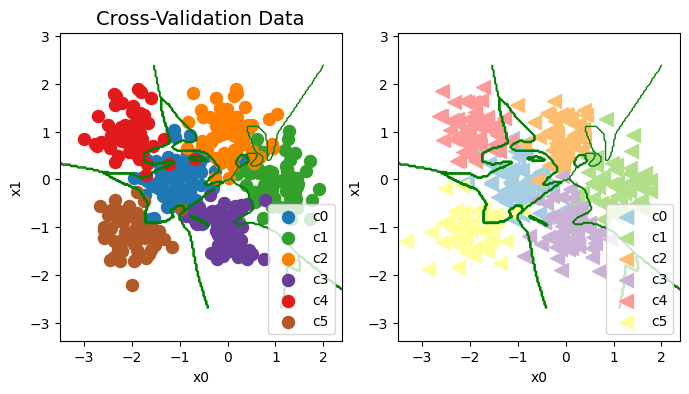

In [25]:
fig, ax = plt.subplots(1,2, figsize=(8,4))

plot_cat_decision_boundary(ax[0], X_train, model_pred, vector=True)
ax[0].set_title("training data", fontsize=14)

plt_mc_data(ax[0], X_train, y_train, classes, map=mpl.colors.ListedColormap(plt.cm.Paired((1,3,7,9,5,11))), legend=True, size=75)
ax[0].set_xlabel('x0') ; ax[0].set_ylabel("x1");

plot_cat_decision_boundary(ax[1], X_train, model_pred, vector=True)
ax[0].set_title("Cross-Validation Data", fontsize=14)
plt_mc_data(ax[1], X_cv, y_cv, classes, map=mpl.colors.ListedColormap(plt.cm.Paired((0,2,6,8,4,10))), legend=True, size=100, m='<')
ax[1].set_xlabel('x0') ; ax[1].set_ylabel("x1");

fig.suptitle("", fontsize=12)
plt.show()

In [26]:
training_cat_err = eval_cat_err(y_train, model_pred(X_train))
cv_cat_err = eval_cat_err(y_cv, model_pred(X_cv))

10/10 [==============================] - 0s 0s/step


### **With Regularization**

In [28]:
reg_model = Sequential(
    [
        Dense(units=120, activation='relu', kernel_regularizer=tf.keras.regularizers.l2(0.1)),
        Dense(units=40, activation='relu', kernel_regularizer=tf.keras.regularizers.l2(0.1)),
        Dense(units=6, activation='linear')
    ]
)

reg_model.compile(
    loss=SparseCategoricalCrossentropy(from_logits=True),
    optimizer=Adam(learning_rate=0.01),
)

In [29]:
reg_model.fit(
    X_train, y_train,
    epochs=1000
)

Epoch 1/1000
13/13 [==============================] - 0s 833us/step - loss: 4.4037
Epoch 2/1000
13/13 [==============================] - 0s 1ms/step - loss: 1.7258
Epoch 3/1000
13/13 [==============================] - 0s 2ms/step - loss: 1.3865
Epoch 4/1000
13/13 [==============================] - 0s 1ms/step - loss: 1.1233
Epoch 5/1000
13/13 [==============================] - 0s 1ms/step - loss: 1.0243
Epoch 6/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.9446
Epoch 7/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.9442
Epoch 8/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.8955
Epoch 9/1000
13/13 [==============================] - 0s 724us/step - loss: 0.8673
Epoch 10/1000
13/13 [==============================] - 0s 796us/step - loss: 0.8313
Epoch 11/1000
13/13 [==============================] - 0s 760us/step - loss: 0.8519
Epoch 12/1000
13/13 [==============================] - 0s 859us/step - loss: 0.7799
Epoch 13/1000
1

In [30]:
reg_model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_6 (Dense)             (None, 120)               360       
                                                                 
 dense_7 (Dense)             (None, 40)                4840      
                                                                 
 dense_8 (Dense)             (None, 6)                 246       
                                                                 
Total params: 5,446
Trainable params: 5,446
Non-trainable params: 0
_________________________________________________________________
